## Import Libraries 

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from IPython.display import Markdown, display
import re

## Load and Process BNB Data 

In [53]:
data = pd.read_csv('BNB Historical Data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data[['Price']] = data[['Price']].astype(float)
data = data.sort_values('Date').reset_index(drop=True)

## 1. BNB Data with 7/3 split 

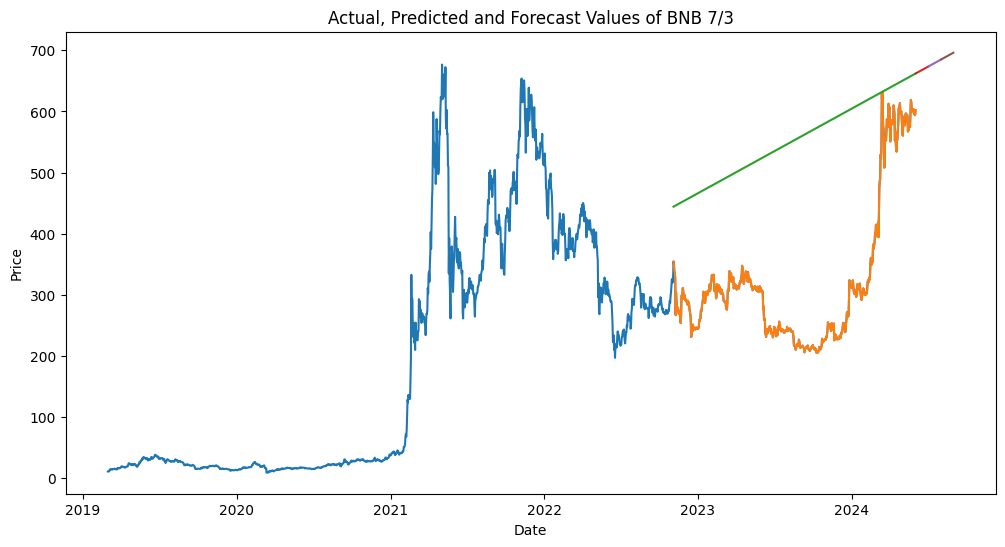

RMSE: 250.2791
MAPE: 86.40%
MSE: 62639.6032


In [54]:
train = data.iloc[:int(len(data) * 0.7)]
test = data.iloc[int(len(data) * 0.7):]
model = LinearRegression()
model.fit(np.array(train.index).reshape(-1, 1), train['Price'])

predictions = model.predict(np.array(test.index).reshape(-1, 1))
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30 = model.predict(np.array(np.arange(test.index[-1] + 1, test.index[-1] + 31)).reshape(-1, 1))
future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60 = model.predict(np.array(np.arange(test.index[-1] + 31, test.index[-1] + 61)).reshape(-1, 1))
future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90 = model.predict(np.array(np.arange(test.index[-1] + 61, test.index[-1] + 91)).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Actual Price')
plt.plot(test['Date'], test['Price'], label='Test Data')
plt.plot(test['Date'], predictions, label='Predictions')
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of BNB 7/3')
plt.show()

 
rmse = np.sqrt(mean_squared_error(test['Price'], predictions))
mape = np.mean(np.abs((test['Price'] - predictions) / test['Price'])) * 100
mse = mean_squared_error(test['Price'], predictions)
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

## 2. BNB Data with 8/2 split 

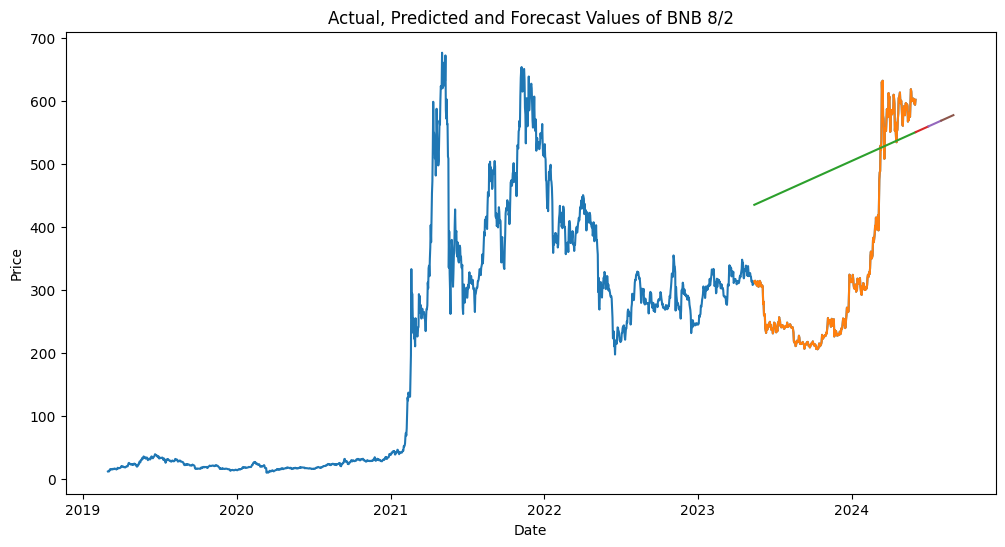

RMSE: 196.3485
MAPE: 69.72%
MSE: 38552.7505


In [55]:
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]
model = LinearRegression()
model.fit(np.array(train.index).reshape(-1, 1), train['Price'])

predictions = model.predict(np.array(test.index).reshape(-1, 1))
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30 = model.predict(np.array(np.arange(test.index[-1] + 1, test.index[-1] + 31)).reshape(-1, 1))
future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60 = model.predict(np.array(np.arange(test.index[-1] + 31, test.index[-1] + 61)).reshape(-1, 1))
future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90 = model.predict(np.array(np.arange(test.index[-1] + 61, test.index[-1] + 91)).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Actual Price')
plt.plot(test['Date'], test['Price'], label='Test Data')
plt.plot(test['Date'], predictions, label='Predictions')
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of BNB 8/2')
plt.show()

rmse = np.sqrt(mean_squared_error(test['Price'], predictions))
mape = np.mean(np.abs((test['Price'] - predictions) / test['Price'])) * 100
mse = mean_squared_error(test['Price'], predictions)
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

## 3. BNB Data with 9/1 

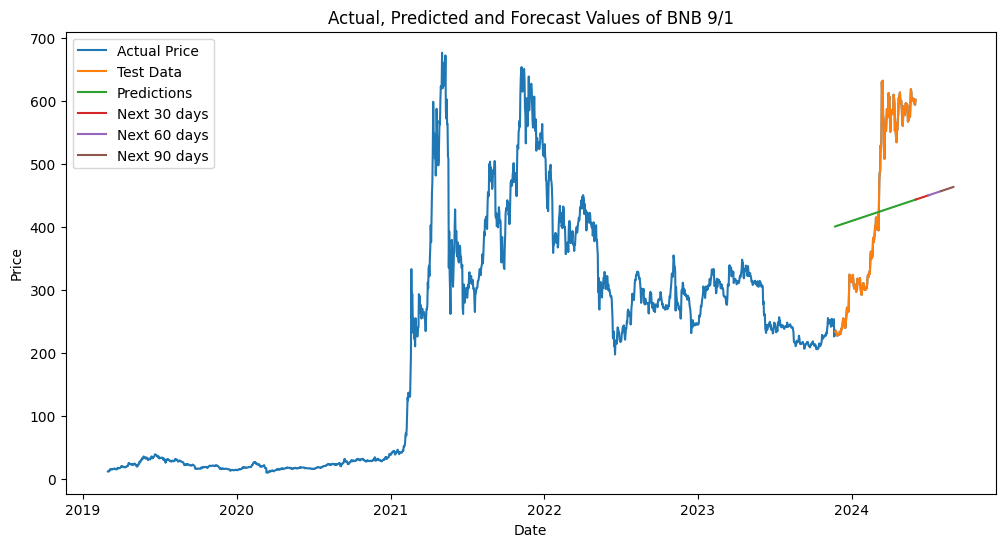

RMSE: 131.9619
MAPE: 32.73%
MSE: 17413.9473


In [56]:
train = data.iloc[:int(len(data) * 0.9)]
test = data.iloc[int(len(data) * 0.9):]
model = LinearRegression()
model.fit(np.array(train.index).reshape(-1, 1), train['Price'])

predictions = model.predict(np.array(test.index).reshape(-1, 1))
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30 = model.predict(np.array(np.arange(test.index[-1] + 1, test.index[-1] + 31)).reshape(-1, 1))
future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60 = model.predict(np.array(np.arange(test.index[-1] + 31, test.index[-1] + 61)).reshape(-1, 1))
future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90 = model.predict(np.array(np.arange(test.index[-1] + 61, test.index[-1] + 91)).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Actual Price')
plt.plot(test['Date'], test['Price'], label='Test Data')
plt.plot(test['Date'], predictions, label='Predictions')
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of BNB 9/1')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test['Price'], predictions))
mape = np.mean(np.abs((test['Price'] - predictions) / test['Price'])) * 100
mse = mean_squared_error(test['Price'], predictions)
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

## Load and Process Dogecoin Data 

In [57]:
data_1 = pd.read_csv('Dogecoin Historical Data.csv')
data_1['Date'] = pd.to_datetime(data_1['Date'], format='%m/%d/%Y')
data_1[['Price']] = data_1[['Price']].astype(float)
data_1 = data_1.sort_values('Date').reset_index(drop=True)

## 4. Dogecoin Data with 7/3 split 

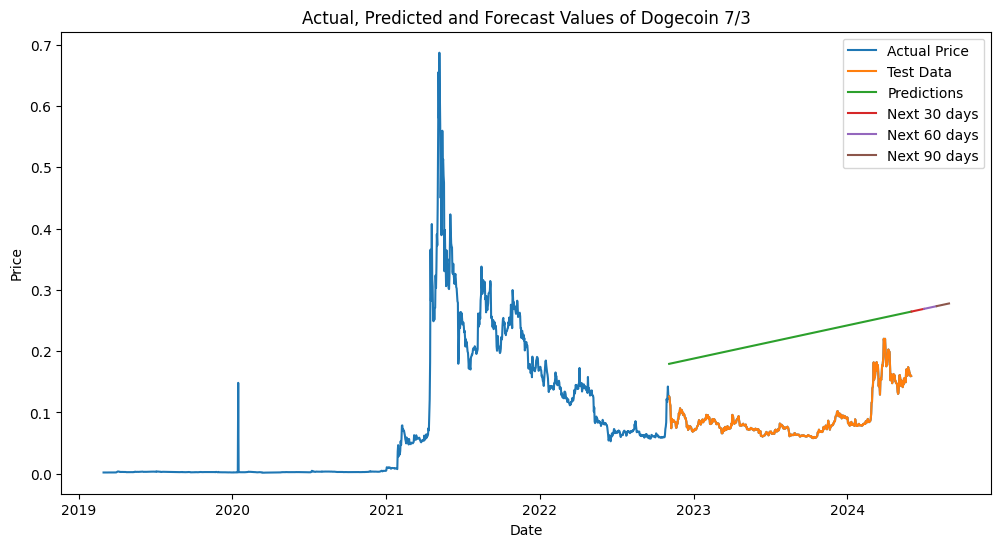

RMSE: 0.1336
MAPE: 163.61%
MSE: 0.0179


In [58]:
train1 = data_1.iloc[:int(len(data_1) * 0.7)]
test1 = data_1.iloc[int(len(data_1) * 0.7):]
model1 = LinearRegression()
model1.fit(np.array(train1.index).reshape(-1, 1), train1['Price'])

predictions_1 = model1.predict(np.array(test1.index).reshape(-1, 1))
future_dates_30_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_1 = model1.predict(np.array(np.arange(test1.index[-1] + 1, test1.index[-1] + 31)).reshape(-1, 1))
future_dates_60_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_1 = model1.predict(np.array(np.arange(test1.index[-1] + 31, test1.index[-1] + 61)).reshape(-1, 1))
future_dates_90_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_1 = model1.predict(np.array(np.arange(test1.index[-1] + 61, test1.index[-1] + 91)).reshape(-1, 1))


plt.figure(figsize=(12, 6))
plt.plot(data_1['Date'], data_1['Price'], label='Actual Price')
plt.plot(test1['Date'], test1['Price'], label='Test Data')
plt.plot(test1['Date'], predictions_1, label='Predictions')
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Dogecoin 7/3')
plt.legend()
plt.show()

rmse1= np.sqrt(mean_squared_error(test1['Price'], predictions_1))
mape1 = np.mean(np.abs((test1['Price'] - predictions_1) / test1['Price'])) * 100
mse1 = mean_squared_error(test1['Price'], predictions_1)
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape1:.2f}%")
print(f"MSE: {mse1:.4f}")

## 5. Dogecoin Data with 8/2 split 

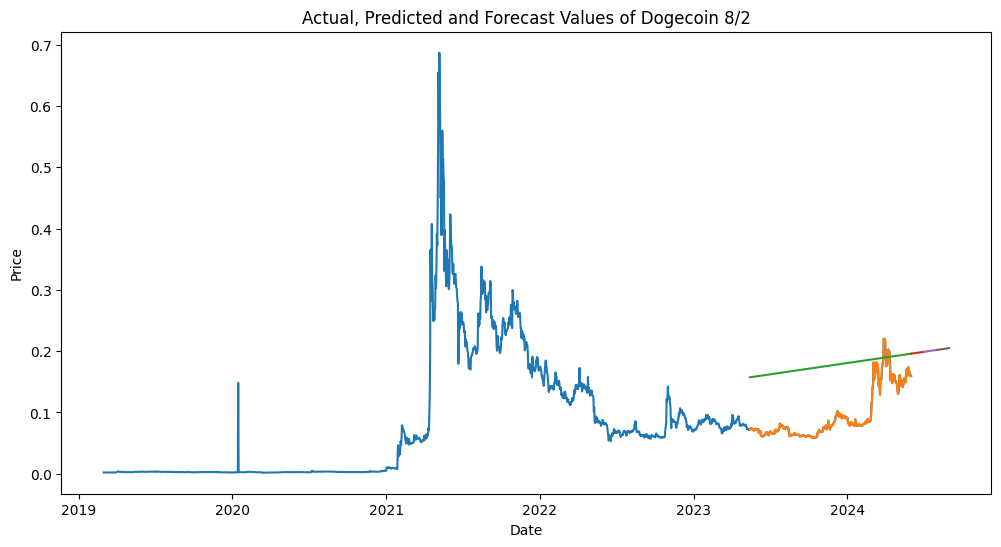

RMSE: 0.0872
MAPE: 108.02%
MSE: 0.0076


In [59]:
train1 = data_1.iloc[:int(len(data_1) * 0.8)]
test1 = data_1.iloc[int(len(data_1) * 0.8):]

model1 = LinearRegression()
model1.fit(np.array(train1.index).reshape(-1, 1), train1['Price'])

predictions_1 = model1.predict(np.array(test1.index).reshape(-1, 1))
future_dates_30_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_1 = model1.predict(np.array(np.arange(test1.index[-1] + 1, test1.index[-1] + 31)).reshape(-1, 1))
future_dates_60_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_1 = model1.predict(np.array(np.arange(test1.index[-1] + 31, test1.index[-1] + 61)).reshape(-1, 1))
future_dates_90_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_1 = model1.predict(np.array(np.arange(test1.index[-1] + 61, test1.index[-1] + 91)).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(data_1['Date'], data_1['Price'], label='Actual Price')
plt.plot(test1['Date'], test1['Price'], label='Test Data')
plt.plot(test1['Date'], predictions_1, label='Predictions')
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of Dogecoin 8/2')
plt.show()

rmse1= np.sqrt(mean_squared_error(test1['Price'], predictions_1))
mape1 = np.mean(np.abs((test1['Price'] - predictions_1) / test1['Price'])) * 100
mse1 = mean_squared_error(test1['Price'], predictions_1)
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape1:.2f}%")
print(f"MSE: {mse1:.4f}")

## 6. Dogecoin Data with 9/1 split 

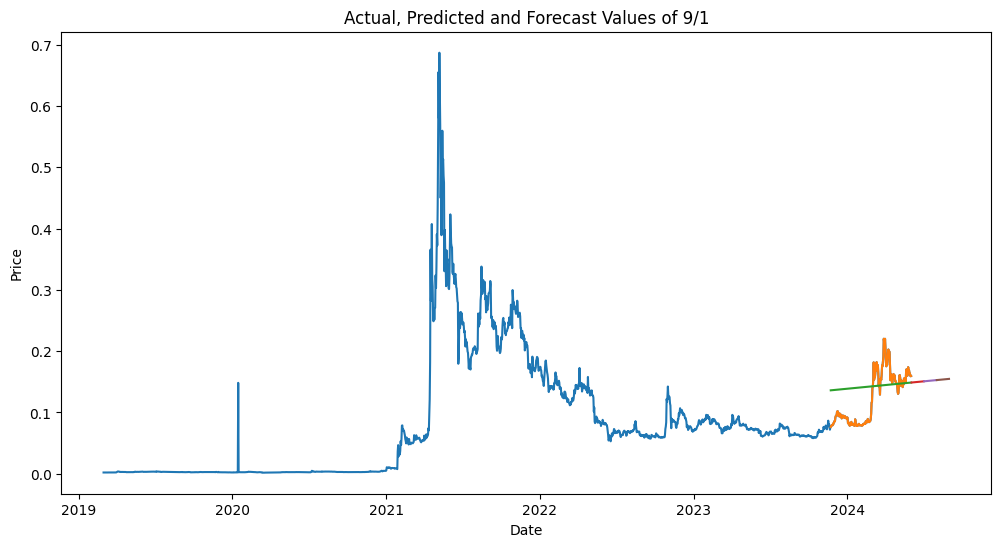

RMSE: 0.0428
MAPE: 37.72%
MSE: 0.0018


In [60]:
train1 = data_1.iloc[:int(len(data_1) * 0.9)]
test1 = data_1.iloc[int(len(data_1) * 0.9):]

model1 = LinearRegression()
model1.fit(np.array(train1.index).reshape(-1, 1), train1['Price'])

predictions_1 = model1.predict(np.array(test1.index).reshape(-1, 1))
future_dates_30_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_1 = model1.predict(np.array(np.arange(test1.index[-1] + 1, test1.index[-1] + 31)).reshape(-1, 1))
future_dates_60_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_1 = model1.predict(np.array(np.arange(test1.index[-1] + 31, test1.index[-1] + 61)).reshape(-1, 1))
future_dates_90_1 = pd.date_range(start=test1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_1 = model1.predict(np.array(np.arange(test1.index[-1] + 61, test1.index[-1] + 91)).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(data_1['Date'], data_1['Price'], label='Actual Price')
plt.plot(test1['Date'], test1['Price'], label='Test Data')
plt.plot(test1['Date'], predictions_1, label='Predictions')
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of 9/1')
plt.show()

rmse1= np.sqrt(mean_squared_error(test1['Price'], predictions_1))
mape1 = np.mean(np.abs((test1['Price'] - predictions_1) / test1['Price'])) * 100
mse1 = mean_squared_error(test1['Price'], predictions_1)
print(f"RMSE: {rmse1:.4f}")
print(f"MAPE: {mape1:.2f}%")
print(f"MSE: {mse1:.4f}")

## Load and Process TRON Data 

In [61]:
data_2 = pd.read_csv('TRON Historical Data.csv')
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%m/%d/%Y')
data_2[['Price']] = data_2[['Price']].astype(float)
data_2 = data_2.sort_values('Date').reset_index(drop=True)

## 7. TRON Data with 7/3 split 

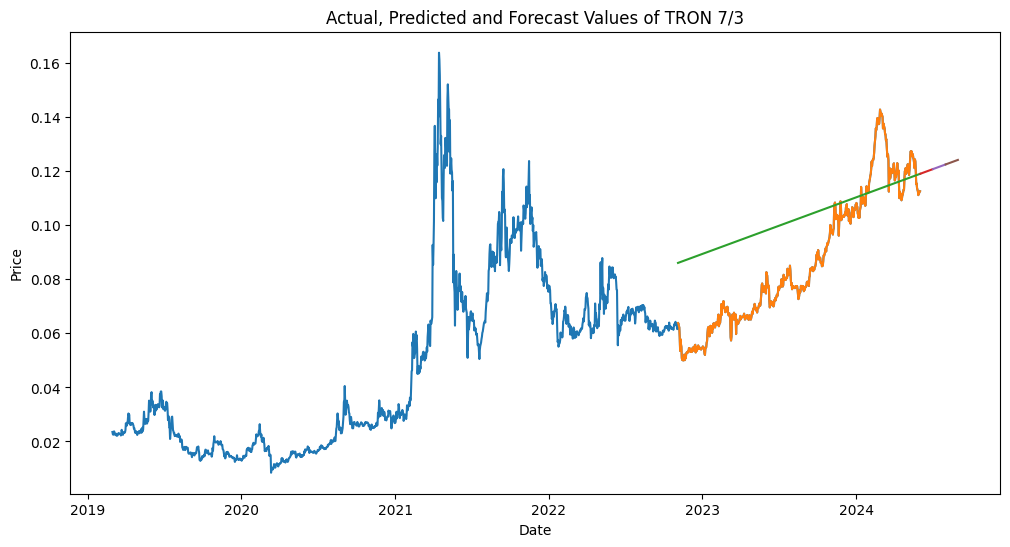

RMSE: 0.0222
MAPE: 27.30%
MSE: 0.0005


In [62]:
train2 = data_2.iloc[:int(len(data_2) * 0.7)]
test2 = data_2.iloc[int(len(data_2) * 0.7):]
model2 = LinearRegression()
model2.fit(np.array(train2.index).reshape(-1, 1), train2['Price'])

predictions_2 = model2.predict(np.array(test2.index).reshape(-1, 1))
future_dates_30_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_2 = model2.predict(np.array(np.arange(test2.index[-1] + 1, test2.index[-1] + 31)).reshape(-1, 1))
future_dates_60_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_2 = model2.predict(np.array(np.arange(test2.index[-1] + 31, test2.index[-1] + 61)).reshape(-1, 1))
future_dates_90_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_2 = model2.predict(np.array(np.arange(test2.index[-1] + 61, test2.index[-1] + 91)).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(data_2['Date'], data_2['Price'], label='Actual Price')
plt.plot(test2['Date'], test2['Price'], label='Test Data')
plt.plot(test2['Date'], predictions_2, label='Predictions')
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of TRON 7/3')
plt.show()

rmse2= np.sqrt(mean_squared_error(test2['Price'], predictions_2))
mape2 = np.mean(np.abs((test2['Price'] - predictions_2) / test2['Price'])) * 100
mse2 = mean_squared_error(test2['Price'], predictions_2)
print(f"RMSE: {rmse2:.4f}")
print(f"MAPE: {mape2:.2f}%")
print(f"MSE: {mse2:.4f}")

## 8. TRON Data with 8/2 split 

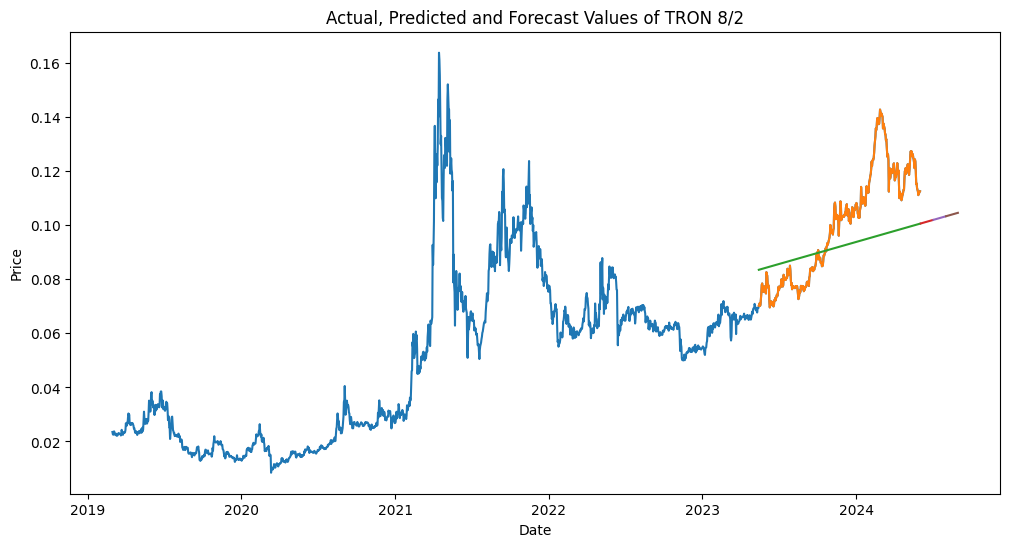

RMSE: 0.0176
MAPE: 13.66%
MSE: 0.0003


In [63]:
train2 = data_2.iloc[:int(len(data_2) * 0.8)]
test2 = data_2.iloc[int(len(data_2) * 0.8):]
model2 = LinearRegression()
model2.fit(np.array(train2.index).reshape(-1, 1), train2['Price'])
predictions_2 = model2.predict(np.array(test2.index).reshape(-1, 1))
future_dates_30_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')[1:]
future_predictions_30_2 = model2.predict(np.array(np.arange(test2.index[-1] + 1, test2.index[-1] + 31)).reshape(-1, 1))[1:]
future_dates_60_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')[1:]
future_predictions_60_2 = model2.predict(np.array(np.arange(test2.index[-1] + 31, test2.index[-1] + 61)).reshape(-1, 1))[1:]
future_dates_90_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')[1:]
future_predictions_90_2 = model2.predict(np.array(np.arange(test2.index[-1] + 61, test2.index[-1] + 91)).reshape(-1, 1))[1:]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(data_2['Date'], data_2['Price'], label='Actual Price')
plt.plot(test2['Date'], test2['Price'], label='Test Data')
plt.plot(test2['Date'], predictions_2, label='Predictions')
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of TRON 8/2')
plt.show()

rmse2= np.sqrt(mean_squared_error(test2['Price'], predictions_2))
mape2 = np.mean(np.abs((test2['Price'] - predictions_2) / test2['Price'])) * 100
mse2 = mean_squared_error(test2['Price'], predictions_2)
print(f"RMSE: {rmse2:.4f}")
print(f"MAPE: {mape2:.2f}%")
print(f"MSE: {mse2:.4f}")

## 9. TRON Data with 9/1 split 

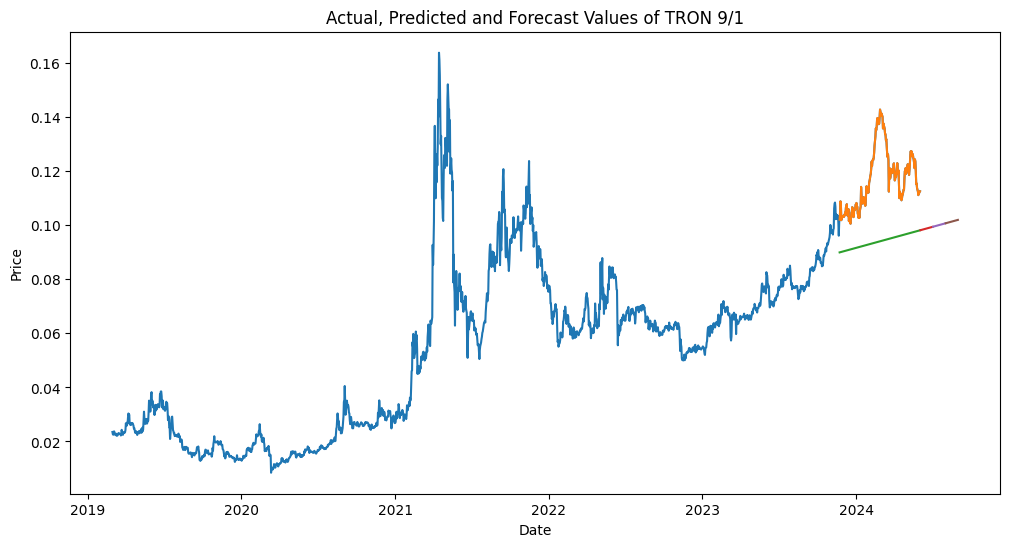

RMSE: 0.0253
MAPE: 19.17%
MSE: 0.0006


In [64]:
train2 = data_2.iloc[:int(len(data_2) * 0.9)]
test2 = data_2.iloc[int(len(data_2) * 0.9):]
model2 = LinearRegression()
model2.fit(np.array(train2.index).reshape(-1, 1), train2['Price'])

predictions_2 = model2.predict(np.array(test2.index).reshape(-1, 1))
future_dates_30_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_predictions_30_2 = model2.predict(np.array(np.arange(test2.index[-1] + 1, test2.index[-1] + 31)).reshape(-1, 1))
future_dates_60_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_predictions_60_2 = model2.predict(np.array(np.arange(test2.index[-1] + 31, test2.index[-1] + 61)).reshape(-1, 1))
future_dates_90_2 = pd.date_range(start=test2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30, freq='D')
future_predictions_90_2 = model2.predict(np.array(np.arange(test2.index[-1] + 61, test2.index[-1] + 91)).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(data_2['Date'], data_2['Price'], label='Actual Price')
plt.plot(test2['Date'], test2['Price'], label='Test Data')
plt.plot(test2['Date'], predictions_2, label='Predictions')
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted and Forecast Values of TRON 9/1')
plt.show()

rmse2= np.sqrt(mean_squared_error(test2['Price'], predictions_2))
mape2 = np.mean(np.abs((test2['Price'] - predictions_2) / test2['Price'])) * 100
mse2 = mean_squared_error(test2['Price'], predictions_2)
print(f"RMSE: {rmse2:.4f}")
print(f"MAPE: {mape2:.2f}%")
print(f"MSE: {mse2:.4f}")